# HUD Capstone Project

### Project: HUB

* TestFit (name of the company)
	* what is the relationship to Alec (Clifton Harness (CEO))
	* Software company for architecture, engineering and construction
	* Generative design software: Making models of stuff for later physical assembly. 
	* How does the system operate? One time purchase? Subscription
* Research Question
    * How many apartments units are being built in the US everyday
        * Why?
        * So that Clifton can target the most valuable markets at the appropriate time
        * Distillate:
        * How many high-density, multifamily (MF) structures are being built in the US everyday. 
* Data
    * U.S Department of Housing and Urban Development, Federal Housing Administration (2006 - 2020)
* Deliverables
    * Deliver actionable insights on the drivers and patterns leading to an increase of high-density in the form of a Jupiter notebook
    * Develop a Time Series Regression + Classification model that predicts which markets are worth targeting and when. 
        * Historical examples to be used in establishment of threshold
            * Houston in 2009
            * Seattle in 2010
            * Dallas in 2012
        * Findings and model to present to potential employers
* Questions:
    * How much can we present about TestFit? Permission for public publication
    * How does the regression / classification apply
    * How granular are we talking, in terms of markets
    * Can we talk to Clifton? Questions about his market and business model
* Biggest concern at the moment:
    * What is our question - how is the data going to help us answer it? How is the question going to help our stakeholder?
    * What does the MVP look like? What are additional features that can lend to more features. 
* Questions for the team:
    * What areas do you enjoy / do best?
    * What tasks do you not like / feel you can’t do?
    * How do you like to work? Prefer quiet time? Prefer collaborative? 

### MVP:
* Time Series / Regression + Classification Model
    * Input: 
    * Output: Prediction of which markets, and at what time period, for business development
* Where is he going to deploy labor / marketing resources?
* Can we narrow it to the top 100 cities in the states?
* Focus on market value


--------


Recommendation of what cities to deploy to (based on "total morgage given"). We will focus on top 25 cities in the US.

### Notes from the data:
* Looking at commitment that has been approved (why commitment’s vs endorsements)
* 

### Timeline:

* Thursday, July 9: Data Scientist Day (Remote)
* Tuesday, July 7: Recordings Completed (in order to have time for video editing)
* Monday, July 6: Recordings
* Thursday, July 2: Review Panel 3 (with staff)
* Wednesday, July 1: Review Panel 2 (with another active cohort)
* Tuesday, June 30: Review Panel 1 (with staff)
* June 29: Polish presentation, code freeze (except if changing visualization titles, axes, etc.)
* June 26: complete project including presentation
* June 24: Not starting anything new, only finishing existing stuff
* MVP: EOD Tuesday
* Friday: acquire
* Wednesday, Thursday: plan

# Acquire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle
import preprocessing

# ignore warnings
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = wrangle.wrangle_hud()

In [3]:
df.head()

,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,TAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,...,TAP,True,False,False,False,False,False,False,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,False,False,False,False,False,False,False,Firm Expired,5247700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20917 entries, 0 to 20917
Data columns (total 29 columns):
fha_number                                                              20917 non-null object
project_name                                                            20917 non-null object
project_city                                                            20917 non-null object
project_state                                                           20917 non-null object
basic_fha_risk_share_or_other                                           20917 non-null object
program_category                                                        20917 non-null object
activity_description                                                    20917 non-null object
activity_group                                                          20917 non-null object
facility_type                                                           20917 non-null object
program_designation                          

In [5]:
# States based on the city counts

df.groupby("project_state")["project_city"].count().nlargest(10)

project_state
TX    1746
CA    1315
OH    1266
IL    1125
IN     993
MI     897
FL     890
MA     868
NC     771
NY     771
Name: project_city, dtype: int64

In [6]:
df.groupby("project_state")["final_mortgage_amount"].sum().nlargest(10)

project_state
TX    22543831014
NY    16181091523
CA    15550261574
FL    11873653840
MA    11713731786
IL    11346587837
MD     9814919838
VA     8694503912
OH     7993692453
NC     7972028094
Name: final_mortgage_amount, dtype: int64

In [7]:
df.nlargest(1, columns="final_mortgage_amount")["project_city"]

2929    Trenton
Name: project_city, dtype: object

In [8]:
print(
    
f'''
      
Morgages Max:
The year is {df.nlargest(1, columns="final_mortgage_amount")["fiscal_year_of_firm_commitment"].values}      
The max is ${df["final_mortgage_amount"].max():,}
The city: {df.nlargest(1, columns="final_mortgage_amount")["project_city"].values}, {df.nlargest(1, columns="final_mortgage_amount")["project_state"].values}

Morgages Min:
The year is {df.nsmallest(1, columns="final_mortgage_amount")["fiscal_year_of_firm_commitment"].values}      
The max is ${df["final_mortgage_amount"].min():,}
The city: {df.nsmallest(1, columns="final_mortgage_amount")["project_city"].values}, {df.nsmallest(1, columns="final_mortgage_amount")["project_state"].values}


    
    
''')


      
Morgages Max:
The year is [2009]      
The max is $755,874,500
The city: ['Trenton'], ['NJ']

Morgages Min:
The year is [2007]      
The max is $70,100
The city: ['Aurora'], ['NC']


    
    



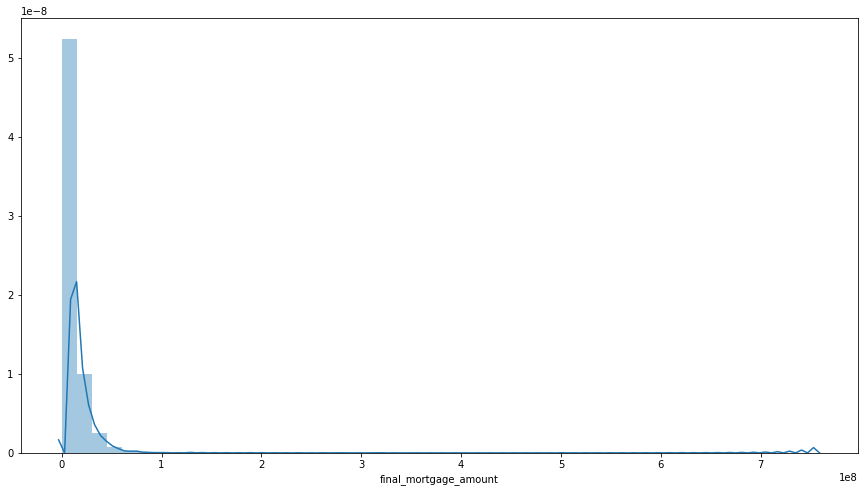

In [9]:
plt.figure(figsize=(15, 8))
sns.distplot(df["final_mortgage_amount"])

In [10]:
# what are the other projects in roxbury?

df[df["activity_description"] == "SubRehab"]["final_mortgage_amount"].median()

6700000.0

In [11]:
# What is the mean?

print(f'The mean mortgage is: ${round(df["final_mortgage_amount"].mean()):,}')

The mean mortgage is: $10,726,440


In [12]:
# What is the upper limit looking at?

df[df["final_mortgage_amount"] > df["final_mortgage_amount"].mean()].groupby("project_state")["final_mortgage_amount"].count().sort_values(ascending=False)

project_state
TX    812
CA    432
FL    411
MA    384
NY    377
IL    367
VA    293
MD    290
NC    255
OH    214
IN    196
MN    195
MI    191
CO    184
NJ    163
TN    163
GA    157
WA    132
LA    128
AZ    124
MO    108
PA    102
AL     98
UT     96
SC     90
OR     78
WI     75
NV     70
CT     67
DC     60
OK     50
MS     45
RI     37
NH     34
NE     33
AR     32
KY     32
NM     25
KS     25
WV     23
ID     21
IA     21
DE     19
MT     17
HI     14
WY     10
ME      8
SD      8
ND      6
VT      4
PR      1
VI      1
AK      1
Name: final_mortgage_amount, dtype: int64

In [13]:
df["project_city"].value_counts()

Chicago          348
Indianapolis     262
Columbus         173
Los Angeles      147
Houston          140
                ... 
Ventnor            1
Moseley            1
Laguana Hills      1
Destin             1
Mount Morris       1
Name: project_city, Length: 4187, dtype: int64

### What are the characteristics of loan practices in Houston (2009), Seattle (2010),  and Dallas (2012)?

In [14]:
# start with Houston 2009

houston = df[df["project_city"] == "Houston"]
print(houston.shape[0])
houston.head()

140


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
277,11411226,Enclave at Willowbrook,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,10114700
657,11435577,Enclave at Cornerstone Apts.,Houston,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,12633300
791,11435583,Enclave at Copperfield Apartments,Houston,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,13852600
1028,11411229,W. Leo Daniels Towers Apartments,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,MAP,False,False,False,False,True,False,False,Finally Endorsed,2190000
1236,11411238,South Houston Vista Apartments,Houston,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,MAP,False,False,False,False,True,False,False,Finally Endorsed,1872900


In [15]:
houston = houston.set_index("fiscal_year_of_firm_commitment")

Text(0.5, 1.0, 'Are there any spikes that we see in the total amount of dollars approved?')

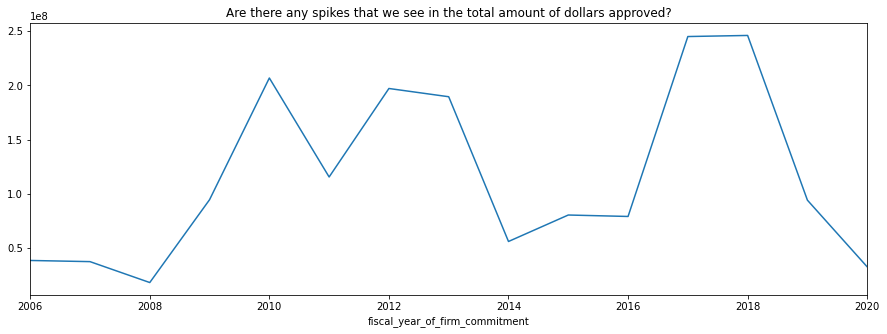

In [16]:
houston.groupby(houston.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")

Text(0.5, 1.0, "Are there any spikes that we see in the quantity of mortgage's approved?")

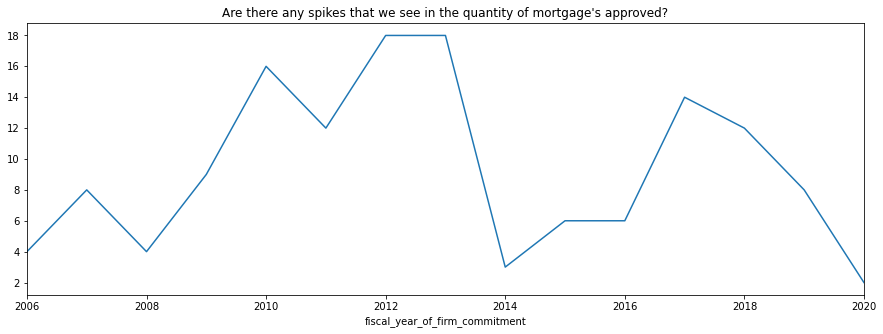

In [17]:
houston.groupby(houston.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")

Text(0.5, 1.0, 'What does the activitiy labels look like on the average amount spent?')

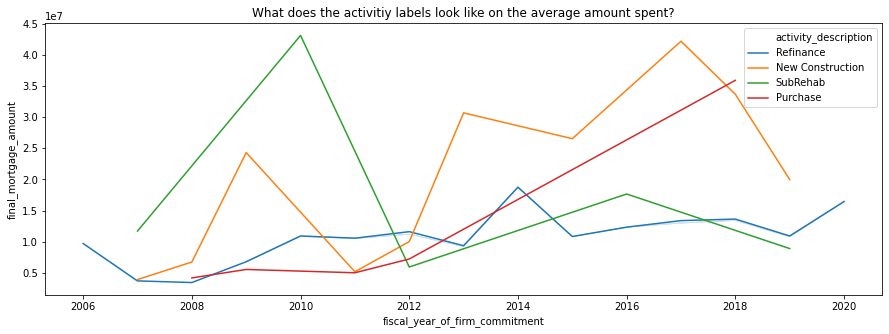

In [18]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=houston, x=houston.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")

Interestingly, we see that there is definitively an upwards spike in 2019 in both the quantity of mortgage's approved, and the total amount of money approved. In terms of the activity description, we can see that `purchase` and `new construction` actually took the majority of the spike in terms of cash flow. The `SubRehab` actually seemed to decrease, meaning that there were more new buildings being built, and less building being remodeled.

----

In [19]:
# Let's look at Seattle 2010

seattle = df[df["project_city"] == "Seattle"]
print(seattle.shape[0])
seattle.head()

59


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
181,12735464,Jackson Apartments,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,464750
426,12743123,Sea Mar Community Care Center,Seattle,WA,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ICF a7 of NC/SR,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,9800000
2213,12710026,Elizabeth James House,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/241a on Apts (not 236/BMIR),...,TAP,False,False,False,False,False,False,False,Finally Endorsed,1940400
3444,12745003,Mary Ruth Manor,Seattle,WA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,...,TAP,False,False,False,False,False,False,False,Finally Endorsed,557500
4996,12711153,The Park on Highland Drive Apartments,Seattle,WA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,MAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,5132700


In [20]:
seattle = seattle.set_index("fiscal_year_of_firm_commitment")

Text(0.5, 1.0, 'Are there any spikes that we see in the total amount of dollars approved?')

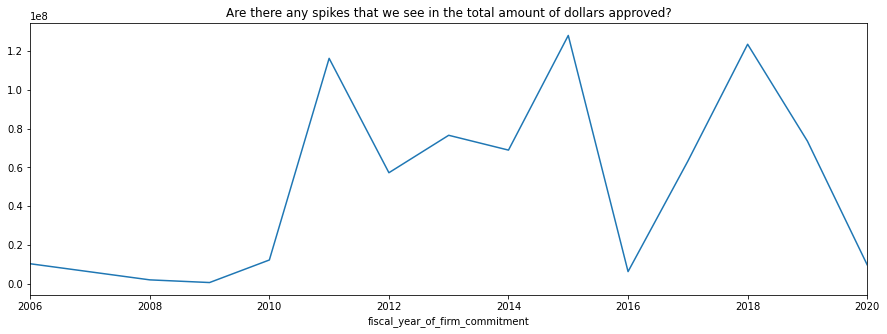

In [21]:
seattle.groupby(seattle.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")

Text(0.5, 1.0, "Are there any spikes that we see in the quantity of mortgage's approved?")

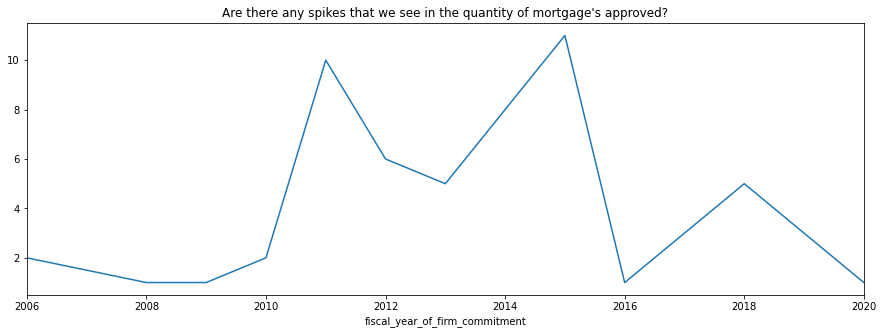

In [22]:
seattle.groupby(seattle.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")

Text(0.5, 1.0, 'What does the activitiy labels look like on the average amount spent?')

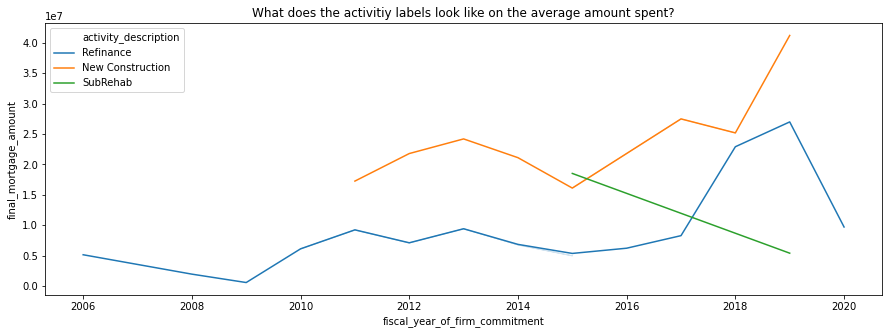

In [23]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=seattle, x=seattle.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")

Seattle is a less clear case. We do see very clear spikes in 2010 when it comes to total amount of dollars approved, and the number of loans issued, but there isn't as much of a clear trend when we look at the activity. It seems that there was an increase in `refinancing` in 2009, but there was no purchases, and new construction ddidn't really start until 2011. I think this one in particular is being affected by a lack of data (only 5 data points from Seattle.)

In [24]:
# Let's look at Dallas 2012

dallas = df[df["project_city"] == "Dallas"]
print(dallas.shape[0])
dallas.head()

114


,fha_number,project_name,project_city,project_state,basic_fha_risk_share_or_other,program_category,activity_description,activity_group,facility_type,program_designation,...,map_or_tap,lihtc_designation,tax_exempt_bond_designation,home_designation,cdbg_designation,section_202_refi_designation,irp_decoupling_designation,hope_vi_designation,current_status,final_mortgage_amount
113,11311098,City Park Lofts,Dallas,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,MAP,False,False,False,False,False,False,False,Finally Endorsed,1312000
118,11397263,Ewing Villas,Dallas,TX,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,...,TAP,True,False,False,False,False,False,False,Finally Endorsed,3865000
170,11311099,"ECHAD Apartments, Phase I & II",Dallas,TX,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,...,MAP,False,False,False,False,True,False,False,Finally Endorsed,6280900
847,11322027,Signature Pointe on the Lake,Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,...,MAP,False,False,False,False,False,False,False,Firm Comit then Owner Withdrew,40000000
912,11322028,"Villa at Mountain View, The",Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,...,MAP,False,False,False,False,False,False,False,Finally Endorsed,11395000


In [25]:
dallas = dallas.set_index("fiscal_year_of_firm_commitment")

Text(0.5, 1.0, 'Are there any spikes that we see in the total amount of dollars approved?')

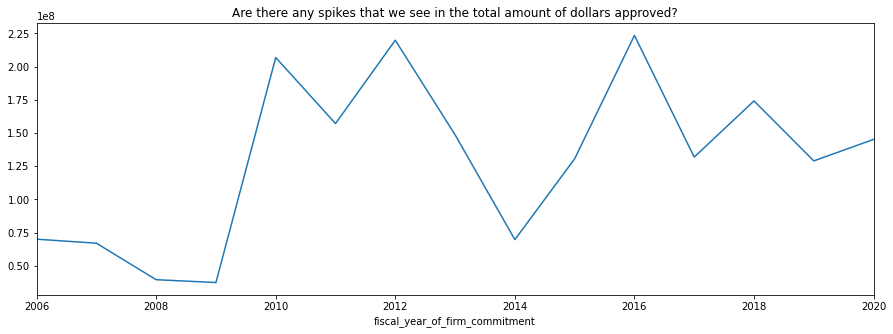

In [26]:
dallas.groupby(dallas.index)["final_mortgage_amount"].sum().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the total amount of dollars approved?")

Text(0.5, 1.0, "Are there any spikes that we see in the quantity of mortgage's approved?")

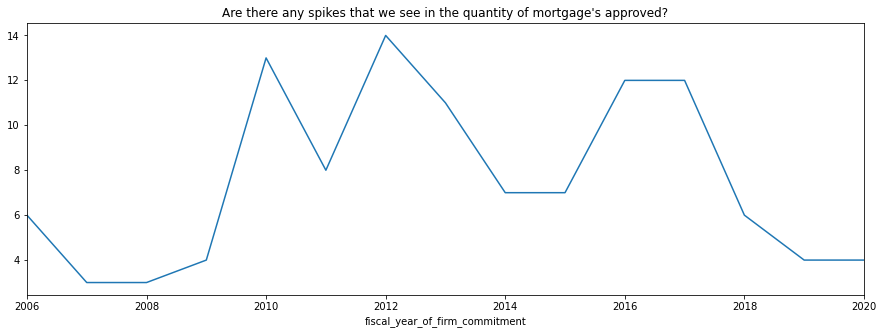

In [27]:
dallas.groupby(dallas.index)["final_mortgage_amount"].count().plot.line(figsize=(15, 5))
plt.title("Are there any spikes that we see in the quantity of mortgage's approved?")

Text(0.5, 1.0, 'What does the activitiy labels look like on the average amount spent?')

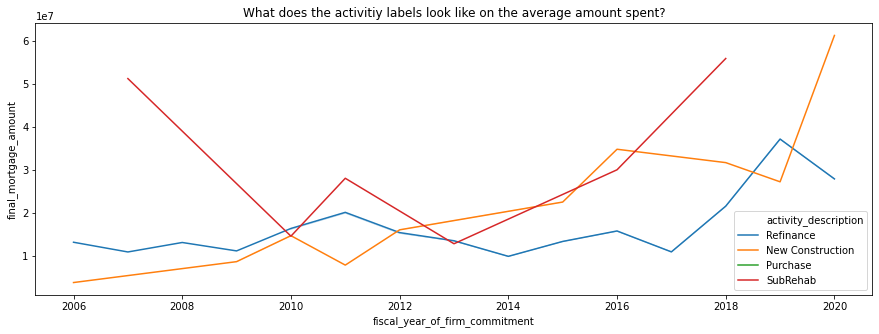

In [28]:
# What does the activity look like the most?

plt.figure(figsize=(15, 5))
sns.lineplot(data=dallas, x=dallas.index, y= "final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activitiy labels look like on the average amount spent?")

Dallas seems like a bit of an outlier, as the peaks for both total dollars approved, and quantity of loans approved started to spike before 2012. I think that the better year to have enter the market would have probably been 2011, as the market was rising. 

In terms of the activties, we do see that there rise in loans is attributted to `New Concstruction`, as it starts to increase in 2012. I am beggining to suspect that this is the category that benefits Clifton the most.

----

## Are there any trends or seasonality over time that we see in terms of number of loans approved / quantity?

In [29]:
# Let's look at quantity of loans approved

df = df.set_index("fiscal_year_of_firm_commitment")

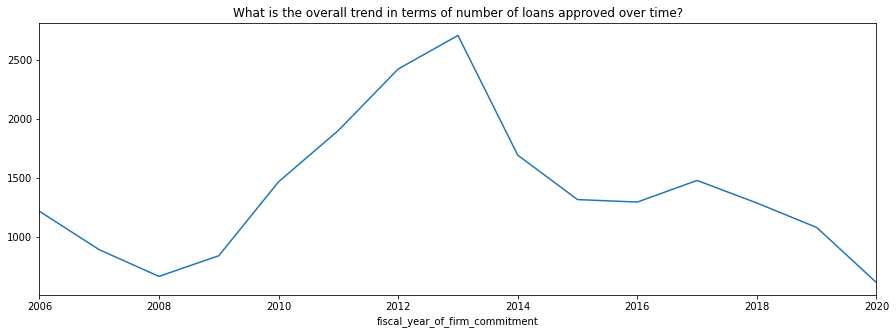

In [30]:
plt.title("What is the overall trend in terms of number of loans approved over time?")
df.groupby(df.index)["final_mortgage_amount"].count().plot.line(figsize=(15,5))

It weirdly seems that the martket peaked in terms of quantity of loans approved in 2013, and it has been decresing since.

In [31]:
states = df.project_state.unique()

In [32]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

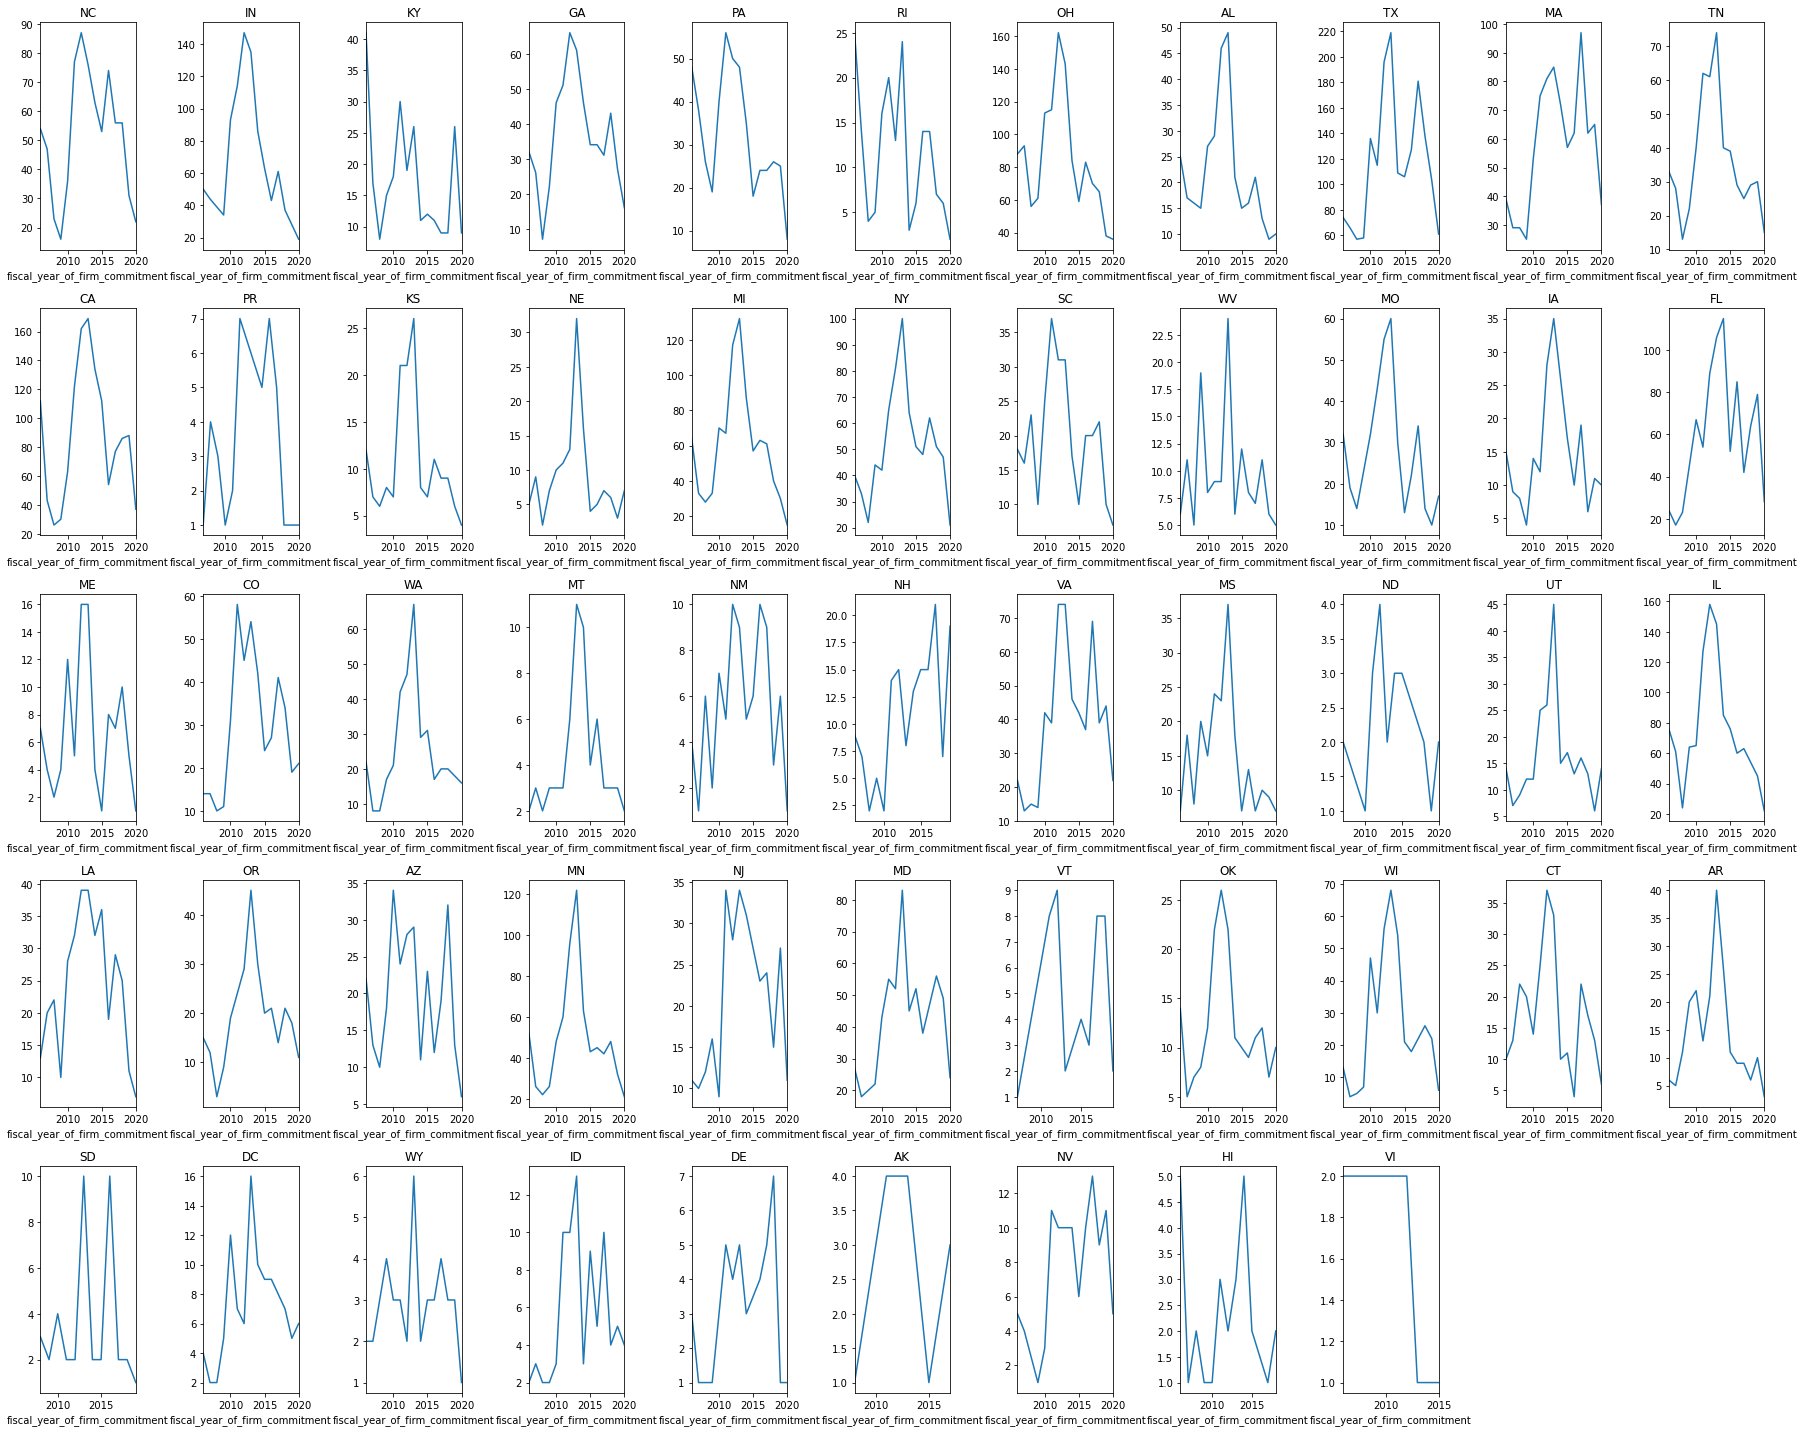

In [33]:
# Are there any states that are doing better in terms of loan approvals?

f = plt.figure(figsize=(25,20))

for count, element in enumerate(states):
    f.add_subplot(5,11, count+1)
    df_state = df[df.project_state == states[count]]
    df_state.groupby(df_state.index)["final_mortgage_amount"].count().plot.line()
    plt.title(f"{element}")

plt.tight_layout()

The graph is hard to read, but it seems that most of the states have had a decrease in the number of loans given.

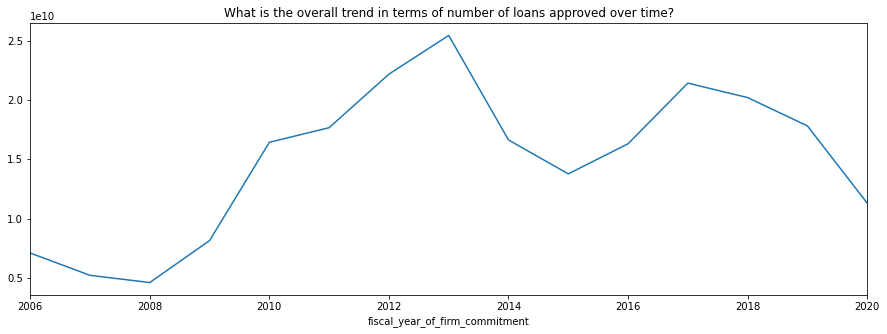

In [34]:
# Let's look at quantity, in dollars, of loans approved

plt.title("What is the overall trend in terms of number of loans approved over time?")
df.groupby(df.index)["final_mortgage_amount"].sum().plot.line(figsize=(15,5))

Similarly, it seems that the quanitity, in dollars, of loans approived had decreased since a peak in 2013

In [35]:
states = df.project_state.unique()

In [36]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

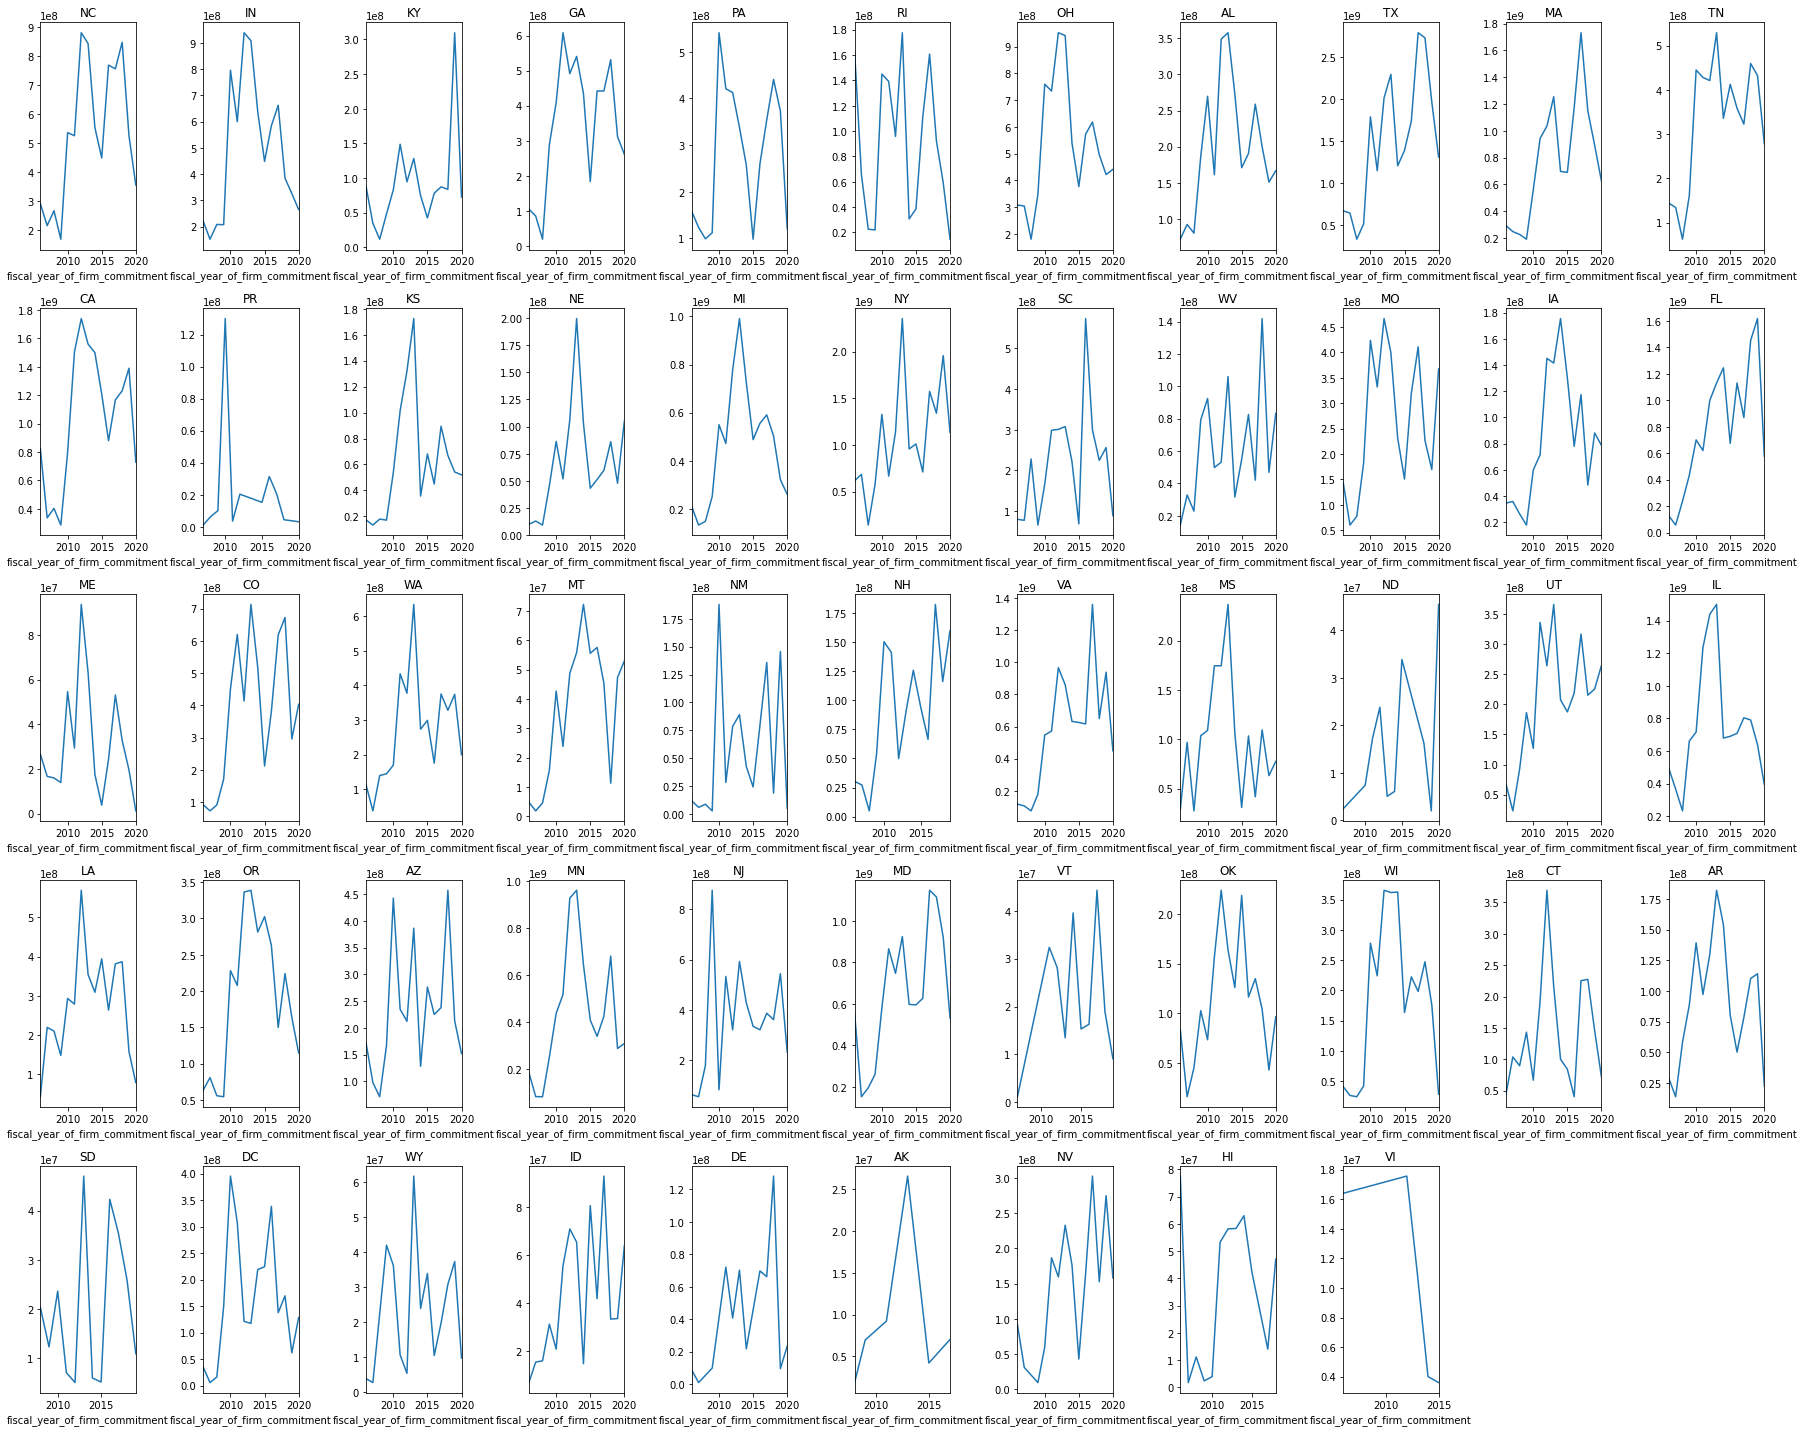

In [37]:
# Are there any states that are doing better in terms of loan approvals?

f = plt.figure(figsize=(25,20))

for count, element in enumerate(states):
    f.add_subplot(5,11, count+1)
    df_state = df[df.project_state == states[count]]
    df_state.groupby(df_state.index)["final_mortgage_amount"].sum().plot.line()
    plt.title(f"{element}")

plt.tight_layout()

----

Text(0.5, 1.0, 'What does the activities look like over time?')

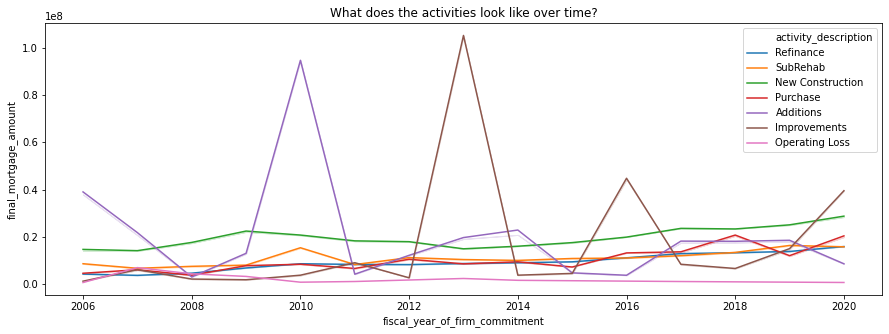

In [38]:
# Let's look at the descriptions

plt.figure(figsize=(15,5))
sns.lineplot(data=df, x=df.index, y="final_mortgage_amount", hue="activity_description", ci=False)
plt.title("What does the activities look like over time?")

It weirdly seems that the martket peaked in terms of quantity of loans approved in 2013, and it has been decresing since.

In [39]:
states = df.project_state.unique()

In [40]:
states = df.sort_values(by = "final_mortgage_amount").project_state.unique()

In [41]:
# # Are there any states that are doing better in terms of loan approvals?

# f = plt.figure(figsize=(25,20))

# for count, element in enumerate(states):
#     f.add_subplot(5,11, count+1)
#     df_state = df[df.project_state == states[count]]
#     sns.lineplot(data=df_state, x=df_state.index, y="final_mortgage_amount", hue="activity_description", ci=False)
#     plt.title(f"{element}")

# plt.tight_layout()
# plt.legend(" ")

## Is there a significant difference, by city, in the number of loans given per year?

Let's do statistical analysis to see if there is a huge difference between cities in terms of the number of loans they give each year.

In [42]:
import scipy.stats as stats

In [43]:
def preprocessing_for_modeling(df):
    """function to manipulate df into df usable for modeling"""
    # city mask identifies 35 cities with most hud loans
    city_mask = df.project_city.value_counts().nlargest(35)
    # apply city mask to shrink the df
    def in_city_mask(x):
        return x in city_mask
    df = df[df.project_city.apply(in_city_mask)]
    #create a df for modelling that groups-by year and city aggregating mortgage amount by count, median, mean, and sum
    df_for_model = (df.groupby(['fiscal_year_of_firm_commitment_activity', 'project_city'])
         .final_mortgage_amount.agg(['count', 'median', 'mean', 'sum']).reset_index())
    df_for_model = df_for_model.rename(columns={'fiscal_year_of_firm_commitment_activity': 'year', 'project_city': 'city'})
    return df_for_model

In [44]:
df = preprocessing_for_modeling(df)

In [45]:
cities = df.city.unique()

In [46]:
subgroup = df[df.city == "Dallas"]["count"]

In [47]:
p_scores = pd.DataFrame()
for city in cities:
    subgroup = df[df.city == city]["count"]
    tstat, p = stats.ttest_1samp(subgroup, df["count"].mean())
    result = pd.DataFrame({"city": city, "p": p}, index=[0])
    p_scores = pd.concat([p_scores, result])

In [48]:
# What percentage of cities are below our alpha (significantly different)

print(f"{p_scores[p_scores.p < 0.05].shape[0] / cities.shape[0]:.0%} of the total cities are below our alpha")

43% of the total cities are below our alpha


We are not trying to predict the city, so it is not as important that the data is significantly different. What we want to see is if there are patterns that we can pick up on that can help us identify those cities that are labeled as good.

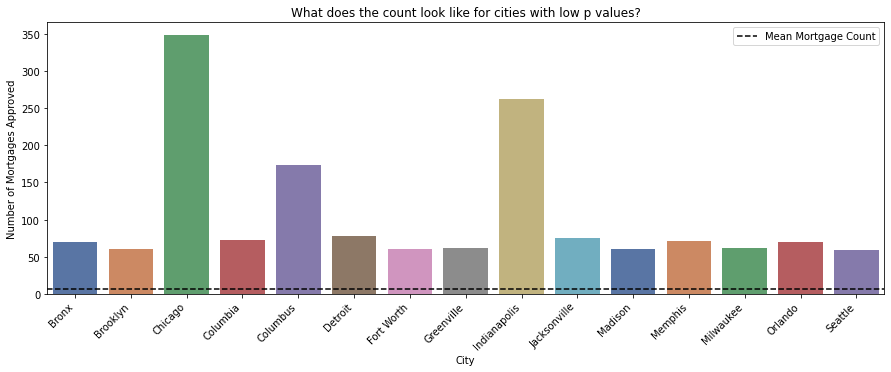

In [49]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p < 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "count": df[df.city == element]['count'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="count", palette="deep")
graph.axhline(df["count"].mean(), ls='--', label="Mean Mortgage Count", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What does the count look like for cities with low p values?")
plt.ylabel("Number of Mortgages Approved")
plt.xlabel("City")
plt.legend()

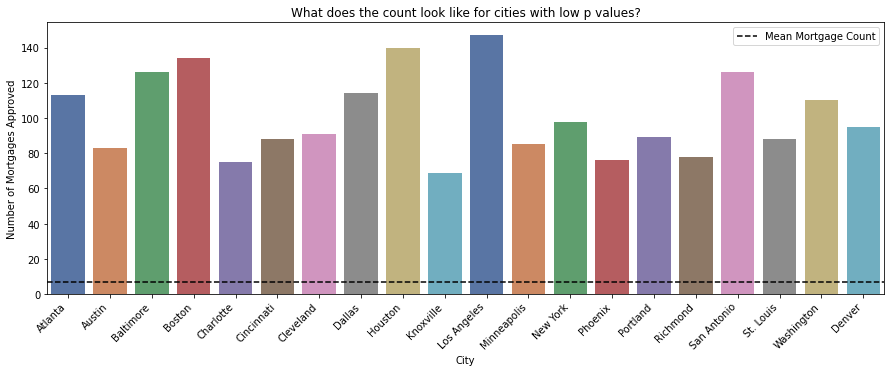

In [50]:
# Of the cities with a high p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p > 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "count": df[df.city == element]['count'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="count", palette="deep")
graph.axhline(df["count"].mean(), ls='--', label="Mean Mortgage Count", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What does the count look like for cities with low p values?")
plt.ylabel("Number of Mortgages Approved")
plt.xlabel("City")
plt.legend()

## Is there a significant difference, by city, in the amount of loans given per year, in dollars?

In [51]:
subgroup = df[df.city == "Dallas"]["mean"]

result = pd.DataFrame({"city": city, "p": p}, index=[0])
result

,city,p
0,Denver,0.80306


In [52]:
p_scores = pd.DataFrame()
for city in cities:
    subgroup = df[df.city == city]["mean"]
    tstat, p = stats.ttest_1samp(subgroup, df["mean"].mean())
    result = pd.DataFrame({"city": city, "p": p}, index=[0])
    p_scores = pd.concat([p_scores, result])

In [53]:
# What percentage of cities are below our alpha (significantly different)

print(f"{p_scores[p_scores.p < 0.05].shape[0] / cities.shape[0]:.0%} of the total cities are below our alpha")

43% of the total cities are below our alpha


We still see that below half of the population actually (in cities) is actually below the p-value. We see that, in dollars, there is at least some difference. 

In [54]:
score = pd.DataFrame({"city": element, "mean":df[df.city == element]['mean'].sum()}, index=[0])
score

,city,mean
0,Denver,1.510949e+08


In [55]:
print(f'The mean mortgage approved, in dollars, ${df["mean"].mean():,.0f}')

The mean mortgage approved, in dollars, $13,515,695


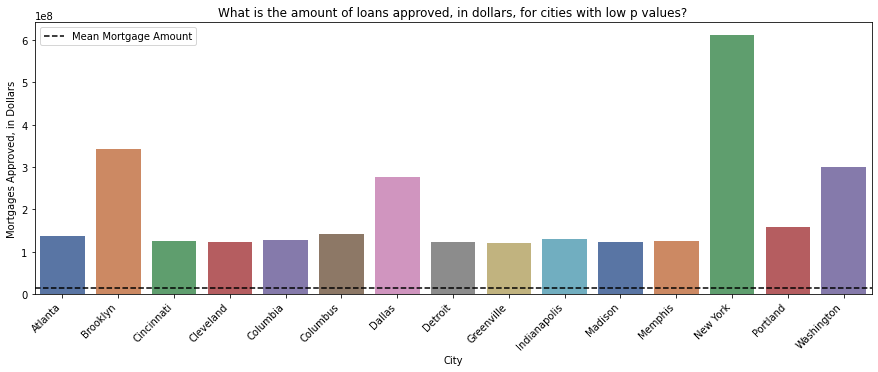

In [56]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p < 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "mean": df[df.city == element]['mean'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="mean", palette="deep")
graph.axhline(df["mean"].mean(), ls='--', label="Mean Mortgage Amount", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What is the amount of loans approved, in dollars, for cities with low p values?")
plt.ylabel("Mortgages Approved, in Dollars")
plt.xlabel("City")
plt.legend()

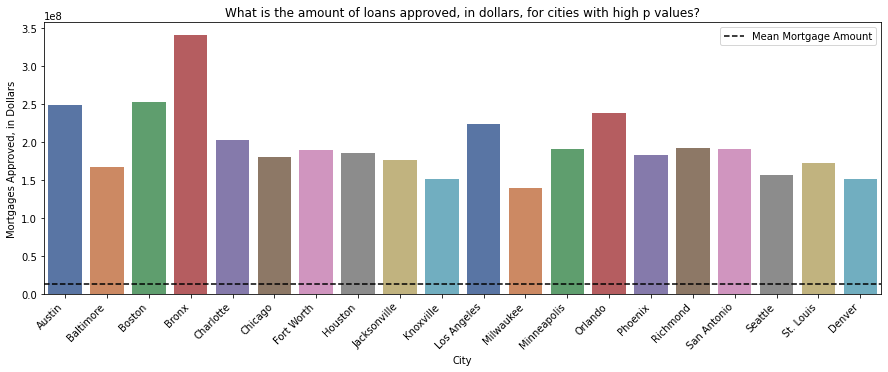

In [57]:
# Of the cities with a low p values, what is the average mortgate count?


u_cities = p_scores[p_scores.p > 0.05].city.unique()
comparison = pd.DataFrame()
for element in u_cities:
    score = pd.DataFrame({"city": element, "mean": df[df.city == element]['mean'].sum()}, index=[0])
    comparison = pd.concat([comparison, score])
    

plt.figure(figsize=(15,5))
graph = sns.barplot(data=comparison, x="city", y="mean", palette="deep")
graph.axhline(df["mean"].mean(), ls='--', label="Mean Mortgage Amount", c="black")
plt.xticks(rotation=45, ha="right")
plt.title("What is the amount of loans approved, in dollars, for cities with high p values?")
plt.ylabel("Mortgages Approved, in Dollars")
plt.xlabel("City")
plt.legend()

## Things to discuss with everyone:

1. Added new list to Trello. This is a bit different, but the idea is that we add new cards as we open different Git Documents. This is to reduce the risk of a merge conflict.
1. Divide exploration:
    * Is there a difference in mortgages by year by type for whole data set?
    * Is there a significant difference, by city, in the number of loans given per year?
    * Is there a significant difference, by city, in the dollar amount of loans approved, by year?
    * What are the characteristics of loan practices in Houston (2009), Seattle (2010),  and Dallas (2012)?
    * Are there any trends or seasonality over time that we see in terms of number of loans approved / quantity?
    * Show the yearly mortgages by type for whole data set?
    

----

# Modeling

## Idea 1:

For this project - we will have to do a time series regression and a time series classification. Essentially, what I think needs to happen is that we feed our features to the regression model, and the output is given for a ceirtain year. 

Then, we can use the output (which will be the predicted level of activity, in a continuous feature) to determine whether a market is worth entering or not.

1. Time Series Model:
    * Objective:
        * To determine what the level of activity will be in a city. We want to use Time Series, to predict what the future mortage is in dollars, the frequency and the number of activities.
    * Considerations:
        * Need to create independent time series models for each city. 
        * If we use FB Prophet, we can only predict one feature at at time
    * Output:
        * A prediction for:
            * Sum of mortages approved (in dollars) by city
            * Number of mortages approved by city)
            * Predicted number of activities (might be a classification problem)
    
1. Classification Model:
    * Objective:
        * To determine what city and when (in year) Testfit should enter the market. 
    * Other ideas:
        * Instead of using time series, we can use Linear Regression, to combine our key features, and predict a "score". To accomplish this, we would need to label the data ourselves, with a score between a 1 or a 10. At that point, this can be come a classification problem, with a time series element where the prediction is done based on a date (as an index). 
    * Output:
        * A score (1 - 10) of whether the city and year would be a good point of entry, given the conditions predicted from the time series model.
        
        
The work flow would look as following:

1. Create a time series model to predict the values above, for the next 5 years. 
1. Evaluate model, and decide on best performer
1. Label the existing data with a score, based on some of the feedback that we get from Clifton
1. Create and fit a classification model to predict the score of the future predictions. 
1. Evaluate and decide on best performer
1. Use classification model to predict score, by city, using the predictions created by the time series, using the index as a reference for year (but datetime won't be a feature). 
1. Use the classification predictions to make recommendations of what cities, at what year, will be the best points of entry for Testfit.

## Idea 2: Optimal

Maggie and the coaches actually suggested doing a classification model, with time as a label.

* Observations:
    * Each observation will have a city, and a year as a label / index.
* Features:
    * Calcualte features that can be standarized across all observations:
        * Some potential examples:
            * Year over Year growth
            * Median 
            * Variance
            * Rolling Avg
            * Num of years since max
            * year over year change
            * percentile among other cities / within a state
            * Evolution index
    * We need to label the data, based on whether Clifton would have historically enter the market or not. 
* Predictions:
    * Calculate the features for 2020/2021, based on trends and time series. 
* Model:
    * Use a classification model to predict the label on the predicted data

---

### What would the data need to look like for modeling

In [58]:
train = pd.DataFrame({"city_year": ["san_antonio_2017" ,"san_antonio_2018"], "year_delta": [.2, .3], "avg_growth": [.5, .4], "score":["enter", "don't enter"]}, index=[0, 1])

In [59]:
predict = pd.DataFrame({"city_year": ["san_antonio_2020"], "year_delta": [.4], "avg_growth": [.3], "score":[" "]}, index=[0])

In [60]:
train

,city_year,year_delta,avg_growth,score
0,san_antonio_2017,0.2,0.5,enter
1,san_antonio_2018,0.3,0.4,don't enter


In [61]:
predict

,city_year,year_delta,avg_growth,score
0,san_antonio_2020,0.4,0.3,


1. Train model using the train data
1. Calculate the features for the next two years (using averages and historical data)
1. predict using the model

-------

In [62]:
df.head()

,year,city,count,median,mean,sum
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800
1,2006,Austin,1,14083843.0,1.408384e+07,14083843
2,2006,Baltimore,6,4570450.0,5.993167e+06,35959000
3,2006,Boston,7,3941300.0,7.059614e+06,49417300
4,2006,Bronx,7,1155300.0,3.298414e+06,23088900


In [63]:
df.city.value_counts()

Chicago         15
Houston         15
Cleveland       15
Columbia        15
Boston          15
Los Angeles     15
Columbus        15
Memphis         15
Detroit         15
Orlando         15
Washington      15
Cincinnati      15
St. Louis       15
Atlanta         15
Minneapolis     15
New York        15
Dallas          15
Baltimore       15
Phoenix         15
Portland        15
Indianapolis    15
Austin          15
Seattle         14
Denver          14
Fort Worth      14
Milwaukee       14
Charlotte       14
Bronx           14
Richmond        14
Jacksonville    14
Greenville      14
Madison         14
Brooklyn        14
San Antonio     14
Knoxville       13
Name: city, dtype: int64

In [64]:
# What is the time range?

df.year.min(), df.year.max() 

(2006, 2020)

-----

## Modeling Prep

Features that we should look at:
* Year over Year growth
* Median 
* Variance
* Rolling Avg
* Num of years since max
* year over year change
* percentile among other cities / within a state
* Evolution index

In [65]:
# mean rate of change

df["mean_var"] = df.sort_values(["city", "year"])["mean"].pct_change() * 100

In [66]:
df = df.sort_values(["city", "year"])

In [67]:
df

,year,city,count,median,mean,sum,mean_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-41.531372
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,4.128730
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854
...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,44.588606
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-56.028956
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,40.615895
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-48.943373


In [68]:
# count rate of change

df["count_var"] = df.sort_values(["city", "year"])["count"].pct_change() * 100

In [69]:
df

,year,city,count,median,mean,sum,mean_var,count_var
0,2006,Atlanta,6,4457100.0,5.531133e+06,33186800,NaN,NaN
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-41.531372,50.000000
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,4.128730,-77.777778
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249,350.000000
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854,22.222222
...,...,...,...,...,...,...,...,...
373,2016,Washington,8,27352400.0,3.910451e+07,312836100,44.588606,0.000000
407,2017,Washington,8,11693000.0,1.719466e+07,137557300,-56.028956,0.000000
442,2018,Washington,7,25450000.0,2.417843e+07,169249000,40.615895,-12.500000
476,2019,Washington,5,9300000.0,1.234469e+07,61723450,-48.943373,-28.571429


In [70]:
# evolution index
# EI = (1 + Company Growth %) / (1 + Market Growth %) X 100

# How can I calculate the market growth for each year?

df["market_growth"] = df.groupby("year").mean_var.transform("mean")

df["ei"] = (1+ df.mean_var) / (1+ df.market_growth) * 100

In [71]:
df["ei"] 

0             NaN
34     -72.280178
66       8.715233
98      50.531434
130      6.778446
          ...    
373     95.207892
407   -112.032668
442    110.828260
476   -359.752093
510    213.472732
Name: ei, Length: 511, dtype: float64

Text(0.5, 0, 'City')

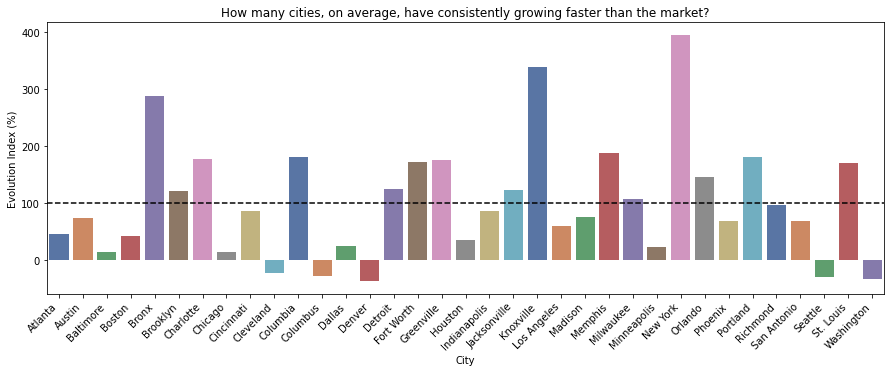

In [72]:
plt.figure(figsize=(15,5))
graph = sns.barplot(data=df, x="city", y="ei", ci=False, palette="deep")
plt.title("How many cities, on average, have consistently growing faster than the market?")
plt.xticks(rotation=45, ha="right")
graph.axhline(100, ls='--', label="Market Growth", c="black")
plt.ylabel("Evolution Index (%)")
plt.xlabel("City")


Really interestingly, 40% of our current cities have had a consistent EI of 100% of more.

In [73]:
# What is the mean count for cities with a 100$

In [74]:
df.sample(10)

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei
10,2006,Columbia,3,2011400.0,6.928067e+06,20784200,-20.044778,0.000000,-53.492567,36.280904
283,2014,Detroit,4,4217400.0,4.129200e+06,16516800,-35.831270,-60.000000,27.099463,-123.957067
281,2014,Dallas,7,11047700.0,9.957043e+06,69699300,-26.338870,-36.363636,27.099463,-90.175636
484,2020,Chicago,9,13770200.0,1.792666e+07,161339900,-0.717165,-30.769231,30.284161,0.904084
364,2016,Minneapolis,5,11300000.0,1.291092e+07,64554600,59.194699,-44.444444,46.883221,125.711464
185,2011,Los Angeles,12,9364900.0,1.264673e+07,151760800,-27.166149,50.000000,-10.008542,290.459305
223,2012,Milwaukee,11,4809200.0,7.924264e+06,87166900,43.171204,83.333333,8.284218,475.766531
437,2018,Portland,6,6390400.0,1.617570e+07,97054200,43.092492,0.000000,36.549895,117.423744
426,2018,Indianapolis,11,9538400.0,1.033811e+07,113719200,-27.017453,-26.666667,36.549895,-69.287687
138,2010,Cleveland,7,5253200.0,9.557457e+06,66902200,385.914746,600.000000,199.987875,192.506511


In [75]:
# Creating the labels

#For now, only three cities will be labeled as enter (Houston 2009, Seattle 2010, Dallas 2012)

df["index"] = np.nan

In [76]:
# Dallas 2012
df.loc[211] = df.loc[211].fillna(1)

In [77]:
# Houston 2009
df.loc[113] = df.loc[113].fillna(1)

In [78]:
# Seattle 2010

df.loc[161] = df.loc[161].fillna(1)

In [79]:
df["index"] = df["index"].fillna(0)

In [80]:
# To avoid Nan's, I have removed all data from 2006 (because all the var's would be nan)

df_model = df[df.year > 2006]

-----

## Classification Model Training

**Index** = `City` + `State` + `Year`

**Features** = `count_var`, `ei`


**target** = `index`

In [81]:
df_model["label"] = df_model.city + "_"  + df_model.year.astype(str)

In [82]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [83]:
df_model.head()

,year,city,count,median,mean,sum,mean_var,count_var,market_growth,ei,index,label
34,2007,Atlanta,9,2990200.0,3.233978e+06,29105800,-41.531372,50.000000,55.075363,-72.280178,0.0,Atlanta_2007
66,2008,Atlanta,2,3367500.0,3.367500e+06,6735000,4.128730,-77.777778,57.847885,8.715233,0.0,Atlanta_2008
98,2009,Atlanta,9,4400000.0,5.552544e+06,49972900,64.886249,350.000000,129.386662,50.531434,0.0,Atlanta_2009
130,2010,Atlanta,11,5196100.0,6.253490e+06,68788385,12.623854,22.222222,199.987875,6.778446,0.0,Atlanta_2010
164,2011,Atlanta,10,4341850.0,5.621590e+06,56215900,-10.104751,-9.090909,-10.008542,101.067973,0.0,Atlanta_2011


In [84]:
features_for_modeling = ["label", "count_var", "ei", "index"]

data = df_model[features_for_modeling].set_index("label")

In [85]:
data

,count_var,ei,index
label,,,
Atlanta_2007,50.000000,-72.280178,0.0
Atlanta_2008,-77.777778,8.715233,0.0
Atlanta_2009,350.000000,50.531434,0.0
Atlanta_2010,22.222222,6.778446,0.0
Atlanta_2011,-9.090909,101.067973,0.0
...,...,...,...
Washington_2016,0.000000,95.207892,0.0
Washington_2017,0.000000,-112.032668,0.0
Washington_2018,-12.500000,110.828260,0.0


In [86]:
train, test = train_test_split(data, train_size=.75, random_state=123)

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score

In [88]:
X_train = train.drop(columns="index")
y_train = train["index"]
X_test = test.drop(columns="index")
y_test = test["index"]

## Decision Tree

In [89]:
#  keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

dtree = DecisionTreeClassifier(max_depth=4)

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(dtree, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [90]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

0.9916666666666667

In [91]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

,criterion,max_depth,score
0,gini,1,0.994413
1,gini,2,0.991635
2,gini,3,0.980400
3,gini,4,0.983208
4,gini,5,0.986017
5,gini,6,0.986017
6,gini,7,0.980400
7,gini,8,0.986017
8,gini,9,0.980400
9,gini,10,0.980400


## Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
#  keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    "min_samples_leaf": range(1,20)
}

rf = RandomForestClassifier(random_state = 123)

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(rf, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

{'max_depth': 1, 'min_samples_leaf': 1}

In [94]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

0.9916666666666667

In [95]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

,max_depth,min_samples_leaf,score
0,1,1,0.994413
1,1,2,0.994413
2,1,3,0.994413
3,1,4,0.994413
4,1,5,0.994413
...,...,...,...
185,10,15,0.994413
186,10,16,0.994413
187,10,17,0.994413
188,10,18,0.994413


## KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()

params = {
    'weights': ["uniform", "distance"],
    "n_neighbors": range(1,20)
}


# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(knn, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [98]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

0.9916666666666667

In [99]:
results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

,n_neighbors,weights,score
0,1,uniform,0.985986
1,1,distance,0.985986
2,2,uniform,0.994413
3,2,distance,0.985986
4,3,uniform,0.994413
5,3,distance,0.994413
6,4,uniform,0.994413
7,4,distance,0.994413
8,5,uniform,0.994413
9,5,distance,0.994413


In [100]:
import preprocessing

In [101]:
test = preprocessing.get_model_df()

In [102]:
test.head()

,city,state,year,quantity_of_mortgages,total_mortgage_amount,average_mortgage_amount,median_mortgage_amount,label
0,Bronx,NY,2013,8,822430600,1.028038e+08,24774500.0,False
1,Trenton,NJ,2009,3,760934400,2.536448e+08,4100000.0,False
2,New York,NY,2013,7,647062504,9.243750e+07,27400000.0,False
3,Chicago,IL,2012,45,520309300,1.156243e+07,8300000.0,False
4,Chicago,IL,2011,43,494045600,1.148943e+07,8677500.0,False


In [103]:
df = preprocessing.get_model_df()

In [104]:
df = preprocessing.add_new_features(df)

----

# For Second Round

For later: 

* Create a new feature for modeling that looks at the percent of the total_mortgage's that are `new_construction` and calcualte their rate of change over time.

In [105]:
df_test = wrangle.wrangle_hud()

In [106]:
 #create a df for modelling that groups-by year and city aggregating mortgage amount by count, median, mean, and sum
df_for_model = (df_test.groupby(['activity_description', 'project_city'])
     .final_mortgage_amount.agg(['count', 'median', 'mean', 'sum']).reset_index())

In [107]:
df_for_model[df_for_model.activity_description == "New Construction"]

,activity_description,project_city,count,median,mean,sum
218,New Construction,Aberdeen,1,27247100.0,27247100.0,27247100
219,New Construction,Abingdon,1,26830900.0,26830900.0,26830900
220,New Construction,Abington,1,8229000.0,8229000.0,8229000
221,New Construction,Acworth,1,4808600.0,4808600.0,4808600
222,New Construction,Addis,3,9788600.0,10216200.0,30648600
...,...,...,...,...,...,...
1272,New Construction,Yonkers,1,100000000.0,100000000.0,100000000
1273,New Construction,Youngsville,2,20691900.0,20691900.0,41383800
1274,New Construction,Yulee,1,30091700.0,30091700.0,30091700
1275,New Construction,Yuma,2,1000000.0,1000000.0,2000000
